In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=7ea1ce0ab57e4d4e62519d03878b1c72cacc3de66d9bfd8716eb9cf940f970ad
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [3]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 4.8 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob as tb
from autocorrect import Speller as sp
import emoji
import nltk
from nltk.tokenize import word_tokenize as wt,sent_tokenize as st
from nltk.corpus import stopwords
from nltk import PorterStemmer,LancasterStemmer,SnowballStemmer
from nltk import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.pipeline import Pipeline ,make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import FunctionTransformer,PowerTransformer

In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### 1.Problem Statement
#### Create a model for predict that coment/text belongs to which type of emotion (fear/angry/joy)

### 2.Data Collection

In [6]:
# take a data set from kaggle which used to classify emotions based on text/comments.
# Convert column names correctly as mensioned in problem statement.
data = pd.read_csv(r"/content/drive/MyDrive/emotion.csv")
data.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


### 3.EDA Before pre-processing

In [7]:
data.shape   # data contains 5937 rows and 2 columns

(5937, 2)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [9]:
data.isnull().sum()     # in this data doesn't have any missing values

Comment    0
Emotion    0
dtype: int64

In [10]:
data.duplicated().sum()     # this data doesn't have any duplicate values

0

In [11]:
data.Emotion.unique()   # unique values for class label of emotions

array(['fear', 'anger', 'joy'], dtype=object)

In [12]:
data.Emotion.value_counts() # 2000 rows belongs to anger , 2000 rows belongs to joy and 1937 rows belongs to fear

anger    2000
joy      2000
fear     1937
Name: Emotion, dtype: int64

In [13]:
# as per my problem statement i don't want some columns,beacuase there is no use for those columns for solve my problem statemnet
# split my data into featue variables and class variables
fv = data.iloc[:,0]
cv = data.iloc[:,-1]

In [14]:
fv.head()

0    i seriously hate one subject to death but now ...
1                   im so full of life i feel appalled
2    i sit here to write i start to dig out my feel...
3    ive been really angry with r and i feel like a...
4    i feel suspicious if there is no one outside l...
Name: Comment, dtype: object

In [15]:
cv= cv.map({"anger":0,"joy":2,"fear":1})    # Covert class labels anger as 0 , joy as 2 and fear as 1

In [16]:
cv.head()

0    1
1    0
2    1
3    2
4    1
Name: Emotion, dtype: int64

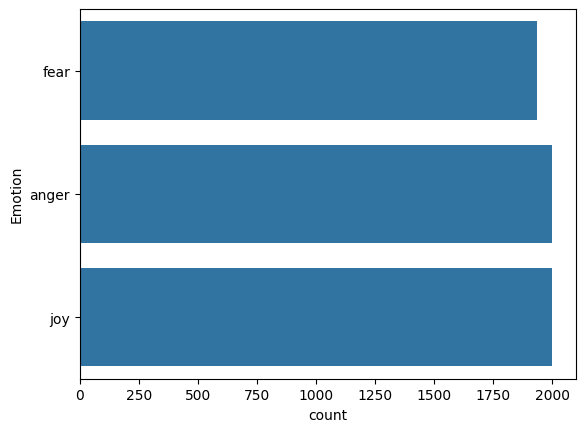

In [17]:
sns.countplot(data.Emotion)
plt.show()

In [18]:
# split my data into x_train and x_test
x_train,x_test,y_train,y_test = train_test_split(fv,cv,test_size=0.2,stratify=cv)

In [19]:
x_train.shape     # x_train data contains 4749 rows

(4749,)

In [20]:
x_test.shape      # x_test data contains 1188 rows

(1188,)

### 4. Pre-processing

In [21]:
# basic pre=processing steps

def lowers(x):
    return x.str.lower()

def html(x):
    return x.apply(lambda x:re.sub("<.+?>"," ",x))

def url(x):
    return x.apply(lambda x:re.sub("https[s]?://.+? +"," ",x))

def unw(x):
    return x.apply(lambda x:re.sub("[]()*\-.:,@#$%&^!?/0-9']"," ",x))

def emoji_remove(x):

    x = x.apply(lambda x : emoji.demojize(x))

    return x

In [23]:
def lemma(x):
  list_stp = stopwords.words("english")  # list_stp contains group of stop words.
  wl=WordNetLemmatizer()

  def lemmatize_text(text):
        words = wt(text)
        lemmatized_words = [wl.lemmatize(word, pos="v") for word in words if word not in list_stp]
        return " ".join(lemmatized_words)

  return x.apply(lemmatize_text)

In [24]:
lemma(fv)

0       seriously hate one subject death feel reluctan...
1                                 im full life feel appal
2       sit write start dig feel think afraid accept p...
3       ive really angry r feel like idiot trust first...
4       feel suspicious one outside like rapture happe...
                              ...                        
5932                                  begin feel distress
5933      leave feel annoy angry think center stupid joke
5934    ever get marry everything ready offer get toge...
5935    feel reluctant apply want able find company kn...
5936             want apologize feel like heartless bitch
Name: Comment, Length: 5937, dtype: object

In [25]:
# create a pipeline for pre-processing the data
pre_pro_pi = Pipeline([("Emoji's", FunctionTransformer(emoji_remove)),("lower",FunctionTransformer(lowers)),("html",FunctionTransformer(html)),
                       ("url",FunctionTransformer(url)),("unw",FunctionTransformer(unw)),("advance",FunctionTransformer(lemma))])

In [26]:
pre_pro_pi

Pipeline(steps=[("Emoji's",
                 FunctionTransformer(func=<function emoji_remove at 0x7c6ac92b8820>)),
                ('lower',
                 FunctionTransformer(func=<function lowers at 0x7c6ac86cd990>)),
                ('html',
                 FunctionTransformer(func=<function html at 0x7c6ac92b89d0>)),
                ('url',
                 FunctionTransformer(func=<function url at 0x7c6ac92b8700>)),
                ('unw',
                 FunctionTransformer(func=<function unw at 0x7c6ac92b8310>)),
                ('advance',
                 FunctionTransformer(func=<function lemma at 0x7c6ac91e7f40>))])

In [27]:
final_pipe = Pipeline([("pre_process",pre_pro_pi),("vectorizer",CountVectorizer())])

In [28]:
final_pipe.fit_transform(x_train)

<4749x6322 sparse matrix of type '<class 'numpy.int64'>'
	with 42721 stored elements in Compressed Sparse Row format>

In [30]:
import pickle
pickle.dump(final_pipe,open(r"/content/drive/MyDrive/twitter analysis/emotions_pre1.pkl","wb"))

### 5.EDA after pre-processing
we are perform on text data,so this is totally based on frequency of words or frequency of chracters or most common words based on types of Targets

In [31]:
xtrain_pre = pre_pro_pi.fit_transform(x_train)

In [32]:
featur_var = pd.DataFrame(xtrain_pre,columns=["Comment"])
class_var = pd.DataFrame(y_train,columns = ["Emotion"])

df = pd.concat([featur_var,class_var],axis=1)    # concat fv and data["Target"] as new data frame
df.head()

,Comment,Emotion
2268,feel little skeptical get lose,1
4174,usually start feel anxious,1
3090,dont know explain well like happily bob along ...,2
4510,feel could ever harm innocent girl way never i...,2
217,sometimes feel hat head,0


In [33]:
df["Emotion"] = df["Emotion"].map({0:"anger",2:"joy",1:"fear"})

In [34]:
df.head()

,Comment,Emotion
2268,feel little skeptical get lose,fear
4174,usually start feel anxious,fear
3090,dont know explain well like happily bob along ...,joy
4510,feel could ever harm innocent girl way never i...,joy
217,sometimes feel hat head,anger


In [35]:
# seperate data into Targets.
gp = df.groupby("Emotion")
anger = gp.get_group("anger")["Comment"]
fear = gp.get_group("joy")["Comment"]
joy = gp.get_group("fear")["Comment"]

In [36]:
gp.get_group("anger")["Comment"]

217                               sometimes feel hat head
1194    feel hostile kinship mount nausea know back me...
5314    able feel slightly less obnoxious know girls j...
3695              often feel resentful anything seem good
3632                                      feel bother spy
                              ...                        
4814               read feel need read make little grumpy
3561                  literally feel hateful glare direct
2151    sort suspect go feel resentful really show bes...
2648    generally eat lot junk mostly stress eat becom...
4780    feel piss fact talented creative many others d...
Name: Comment, Length: 1600, dtype: object

In [37]:
# Combine entire rows text into one text
ft = " ".join(gp.get_group("anger")["Comment"]).split()
jt = " ".join(gp.get_group("joy")["Comment"]).split()
at = " ".join(gp.get_group("fear")["Comment"]).split()


In [38]:
# find how many words contain each emotion
print("anger class contains",len(ft),"number of words")
print("joy class contains",len(jt),"number of words")
print("fear class contains",len(at),"number of words")

anger class contains 14658 number of words
joy class contains 15500 number of words
fear class contains 14269 number of words


### find top most common words in each class

In [39]:
pip install wordcloud

In [40]:
from collections import Counter
Counter(ft).most_common(10)

[('feel', 1666),
 ('like', 283),
 ('im', 252),
 ('get', 166),
 ('make', 108),
 ('time', 106),
 ('want', 102),
 ('think', 97),
 ('go', 96),
 ('know', 95)]

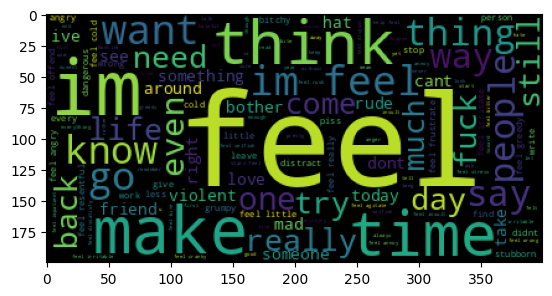

In [41]:
from wordcloud import WordCloud
wc = WordCloud().generate(" ".join(gp.get_group("anger")["Comment"]))
plt.imshow(wc)
plt.show()

In [42]:
Counter(jt).most_common(10)

[('feel', 1694),
 ('like', 298),
 ('im', 230),
 ('make', 148),
 ('get', 136),
 ('go', 113),
 ('want', 102),
 ('time', 96),
 ('really', 89),
 ('think', 82)]

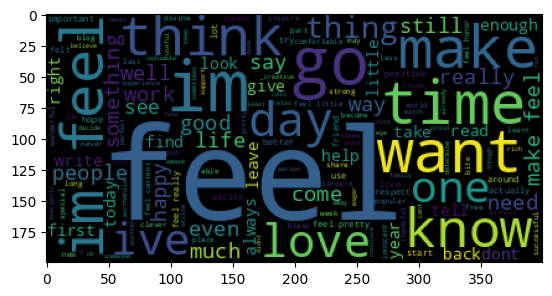

In [43]:
from wordcloud import WordCloud
wc = WordCloud().generate(" ".join(gp.get_group("joy")["Comment"]))
plt.imshow(wc)
plt.show()

In [44]:
Counter(at).most_common(10)

[('feel', 1619),
 ('im', 251),
 ('like', 206),
 ('go', 129),
 ('little', 123),
 ('know', 119),
 ('get', 111),
 ('bite', 101),
 ('make', 99),
 ('want', 92)]

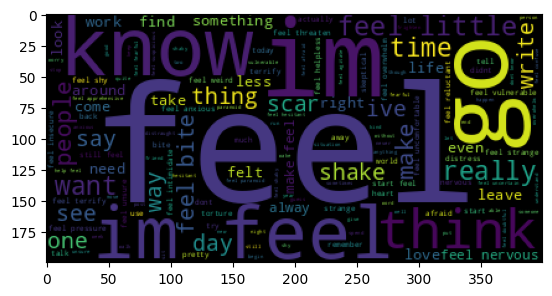

In [45]:
from wordcloud import WordCloud
wc = WordCloud().generate(" ".join(gp.get_group("fear")["Comment"]))
plt.imshow(wc)
plt.show()

### 6.Feature engineering

In [46]:
xtest_pre = pre_pro_pi.transform(x_test)
cv = CountVectorizer()    # it will take CountVectorizer function

### 7.Training

In [47]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,CategoricalNB

In [48]:
final_xtrain = final_pipe.fit_transform(x_train)
final_xtest = final_pipe.transform(x_test)

In [49]:
mb = MultinomialNB()
model = mb.fit(final_xtrain,y_train)

In [50]:
(final_xtrain)


<4749x6322 sparse matrix of type '<class 'numpy.int64'>'
	with 42721 stored elements in Compressed Sparse Row format>

In [51]:
pickle.dump(model,open(r"/content/drive/MyDrive/twitter analysis/emotion_model1.pkl","wb"))

### 8.Model Evalution

In [52]:
from sklearn.metrics import accuracy_score , classification_report,confusion_matrix

In [53]:
accuracy_score(y_test,model.predict(final_xtest))  # By using multinominal it will give 90% of accuracy rate

0.9031986531986532

In [54]:
print(classification_report(y_test,model.predict(final_pipe.transform(x_test))) )

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       400
           1       0.90      0.90      0.90       388
           2       0.94      0.89      0.91       400

    accuracy                           0.90      1188
   macro avg       0.90      0.90      0.90      1188
weighted avg       0.90      0.90      0.90      1188



### 9.Testing

In [56]:
m = final_pipe.transform(pd.Series("i am very happy today.because i got job at top mnc company"))
pred = model.predict(m)   # it is used to shows that predicted value

if pred == 0:
    print("anger")
elif pred == 1:
  print("fear")
else:
    print("joy")

joy


finally I send a text as querry to the model,then it will give the result as real emotion of that text is "JOY"

### 10. Conclusion

In conclusion, the development of a model for predicting the emotion conveyed in text represents a significant advancement in sentiment analysis. Through the utilization of sophisticated machine learning algorithms and comprehensive datasets, we have the capability to accurately classify text into various emotional categories, ranging from joy and  fear and anger.